# README
---

## For the reader

<h4> Note that the following boxes appear in this notebook: </h4>

<div class="alert alert-block alert-success"><b>Green boxes:</b> Comments about results. </div>

<div class="alert alert-block alert-warning"><b>Yellow boxes:</b> Notes and warnings. </div>

<div class="alert alert-block alert-danger"><b>Red boxes:</b> Places you need to alter the code if you want to run it for yourself. </div>

## Brief Overview

<ul>
    <li><a href="#importing-necessary-libraries">1. Importing Necessary Libraries</a></li>
    <li><a href="#data-import-and-preparation">2. Data Import and Preparation</a>
        <ul>
            <li>2.1 Import Data</li>
                <ul>
                <li>Option 1: Importing Data from SQL</a></li>
                <li>Option 2: Importing Data from CSV</a></li>
                </ul>
            <li>2.2 Setting and Checking Column Data Types</a>
                <ul>
                    <li>2.3.1 Assigning Data Types</a></li>
                    <li>2.3.2 Verifying Data Types</a></li>
                </ul>
            </li>
        </ul>
    </li>
    <li><a href="#exploratory-data-analysis">3. Exploratory Data Analysis (EDA)</a>
        <ul>
            <li><a href="#descriptive-statistics">3.1 Descriptive Statistics</a></li>
            <li><a href="#data-visualization">3.2 Data Visualization</a>
                <ul>
                    <li><a href="#about-number-of-rides">3.2.1 About Number of Rides</a>
                        <ul>
                            <li>A. Pie Chart: Number of Rides (Members vs Casuals)</a></li>
                            <li>B. Weekly Ride Distribution (Members vs Casuals)</a></li>
                            <li>C. Monthly Ride Distribution (Members vs Casuals)</a></li>
                        </ul>
                    </li>
                    <li><a href="#about-ride-duration">3.2.2 About Ride Duration</a>
                        <ul>
                            <li>A. Weekly Ride Duration (Members vs Casuals)</a></li>
                            <li>B. Monthly Ride Duration (Members vs Casuals)</a></li>
                        </ul>
                    </li>
                    <li><a href="#about-rideable-type">3.2.3 About Rideable Type</a>
                        <ul>
                            <li>A. Bar Chart: Rideable Type (Electric vs Classic Bikes)</a></li>
                            <li>B. Bar Charts: Rideable Types for Members vs Casuals</a></li>
                        </ul>
                    </li>
                </ul>
            </li>
        </ul>
    </li>
</ul>


# 1. Importing Necessary Libraries <a id="importing-necessary-libraries"></a>
---

**pip that need to be installed:**  
pip install jupyter lab  
pip install numpy  
pip install pandas  
pip install sqlalchemy  
pip install psycopg2-binary  
pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import os
from sqlalchemy import create_engine #to import data from sql
import matplotlib.pyplot as plt # graphs
from matplotlib import rc

# 2. Data Import and Preparation <a id="data-import-and-preparation"></a>
---

## 2.1 Import
---

### Option 1: Importing Data from SQL

<div class="alert alert-block alert-danger"><b>Important:</b> Change connection inputs to your database inputs. <br> Running the following code may take some minutes </div>

import pandas as pd
from sqlalchemy import create_engine
#--------------change this part ------------------
# Database Inputs
db_name = 'divvy-tripdata'
db_user = 'postgres'
db_password = 'postgres'
db_host = 'localhost'
db_port = '5432'
#-------------------------------------------------
# Create an engine
engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
query = '''SELECT
    ride_id, 
    rideable_type,
    started_at,
    ended_at,
    start_lat,
    start_lng,
    end_lat,
    end_lng,
    member_casual,
    ride_duration,
    day_of_the_week,
    month
FROM bike_data'''
# Create Dataframe:
df = pd.read_sql(query, engine)
# Print Dataframe:
print(df)

#create a csv file for imported data from SQL
folder = r'C:\0.Sync\Coding\Data\Projects\CyclisticBike-Share'
file = 'divvy-tripdata_2023.csv'
path=os.path.join(folder, file)
df.to_csv(path, index=False)
print("CSV divvy-tripdata_2023.csv, created")

### Option 2: Importing Data from CSV

<div class="alert alert-block alert-danger"><b>Important:</b> Change folder,file to you path and csv file name </div>

In [2]:
#--------------change this part ------------------
folder = r'C:\0.Sync\Coding\Data\Projects\CyclisticBike-Share'
file = 'divvy-tripdata_2023.csv'
#-------------------------------------------------
path=os.path.join(folder, file)
df= pd.read_csv(path)
print(df)

                  ride_id  rideable_type           started_at  \
0        C4E20E743EEBE781   classic_bike  2023-08-02 19:05:40   
1        AB17A09B37BAD39A  electric_bike  2023-08-18 22:53:20   
2        0B17D56196D063EA  electric_bike  2023-08-19 07:56:18   
3        2A13287E5EC2CF69  electric_bike  2023-08-01 18:28:08   
4        1B7F1EB9737E7BBF  electric_bike  2023-08-01 17:24:05   
...                   ...            ...                  ...   
5719872  D0999A931724CACE  electric_bike  2023-04-15 13:11:52   
5719873  EFE86CD88CB1E5A2  electric_bike  2023-04-30 09:22:31   
5719874  438A83BF9F60BF50  electric_bike  2023-04-26 19:52:11   
5719875  C0317955023D29A7   classic_bike  2023-04-21 08:55:04   
5719876  C683EBE98B35F092  electric_bike  2023-08-21 18:48:13   

                    ended_at  start_lat  start_lng    end_lat    end_lng  \
0        2023-08-02 19:46:57  41.886976 -87.612813  41.922167 -87.638888   
1        2023-08-18 23:03:28  41.915845 -87.634696  41.900000 -87.6

## 2.2 Setting and Checking Column Data Types
---

### 2.2.1 Assigning Data Types

In [3]:
# Set data types:
df['ride_id'] = df['ride_id'].astype(str)  # 16 length, unique, hex

# Convert to categorical - will set them to have order
df['rideable_type'] = df['rideable_type'].astype('category')
#rideable_type_order=['classic_bike', 'electric_bike', 'docked_bike']
#df['rideable_type'] = pd.Categorical(df['rideable_type'], categories=rideable_type_order, ordered=True)

member_casual_order=['member','casual']
df['member_casual'] = pd.Categorical(df['member_casual'], categories=member_casual_order, ordered=True)

day_of_the_week_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_of_the_week'] = pd.Categorical(df['day_of_the_week'], categories=day_of_the_week_order, ordered=True)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Convert to datetime
df['started_at'] = pd.to_datetime(df['started_at'])  
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Convert to float
df['start_lat'] = df['start_lat'].astype('float64')
df['start_lng'] = df['start_lng'].astype('float64')
df['end_lat'] = df['end_lat'].astype('float64')
df['end_lng'] = df['end_lng'].astype('float64')
df['ride_duration'] = df['ride_duration'].astype('float64')

### 2.2.2 Verifying Data Types

In [4]:
print(df.dtypes)

ride_id                    object
rideable_type            category
started_at         datetime64[ns]
ended_at           datetime64[ns]
start_lat                 float64
start_lng                 float64
end_lat                   float64
end_lng                   float64
member_casual            category
ride_duration             float64
day_of_the_week          category
month                    category
dtype: object


In [5]:
if_unique_ride_id=df['ride_id'].nunique()==df.shape[0]
print(f"All ride_id's are unique={if_unique_ride_id}")

All ride_id's are unique=True


In [6]:
columns_check=['rideable_type','member_casual','day_of_the_week','month']
for i in columns_check:
    print(f"{i} has {df[i].unique()} values\n and unique values {df[i].nunique()}\n")

rideable_type has ['classic_bike', 'electric_bike', 'docked_bike']
Categories (3, object): ['classic_bike', 'docked_bike', 'electric_bike'] values
 and unique values 3

member_casual has ['casual', 'member']
Categories (2, object): ['member' < 'casual'] values
 and unique values 2

day_of_the_week has ['Wed', 'Fri', 'Sat', 'Tue', 'Thu', 'Sun', 'Mon']
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat' < 'Sun'] values
 and unique values 7

month has ['Aug', 'Apr', 'May', 'Jun', 'Sep', ..., 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
Length: 12
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec'] values
 and unique values 12



# 3. Exploratory Data Analysis (EDA)<a id="exploratory-data-analysis"></a>
---

## 3.1 Descriptive Statistics <a id="descriptive-statistics"></a>
---

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ride_id          object        
 1   rideable_type    category      
 2   started_at       datetime64[ns]
 3   ended_at         datetime64[ns]
 4   start_lat        float64       
 5   start_lng        float64       
 6   end_lat          float64       
 7   end_lng          float64       
 8   member_casual    category      
 9   ride_duration    float64       
 10  day_of_the_week  category      
 11  month            category      
dtypes: category(4), datetime64[ns](2), float64(5), object(1)
memory usage: 370.9+ MB


In [8]:
# column list based on dtype
category_columns = df.select_dtypes(include=['category']).columns.tolist()
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()

#All Missing values
missing_values = df.isnull().sum()
#1. Categorical Data
categorical_summary = df[category_columns].describe()
#2. Datetime Data
datetime_summary=df[datetime_columns].describe()
#3. Numeric Data
float_summary=df[float_columns].describe().map(lambda x: f'{x:,.2f}')
#4. object -> ride_id (all are unique)
object_summary=df[object_columns].describe()

#all printouts
print("----Missing values----")
print(missing_values)
print("----------------Summary:Categorical Data----------------")
print(categorical_summary)
print("----------------Categorical value counts----------------")
for col in category_columns:
    print("\n",df[col].value_counts().sort_values())
print("----------------Summary:Datetime Data----------------")
print(datetime_summary)
print("----------------Summary:Numeric Data----------------")
print(float_summary)
print("----------------Summary:ride_id----------------")
print(object_summary)


----Missing values----
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_lat             0
start_lng             0
end_lat            6993
end_lng            6993
member_casual         0
ride_duration       272
day_of_the_week       0
month                 0
dtype: int64
----------------Summary:Categorical Data----------------
        rideable_type member_casual day_of_the_week    month
count         5719877       5719877         5719877  5719877
unique              3             2               7       12
top     electric_bike        member             Sat      Aug
freq          2945579       3660698          883566   771693
----------------Categorical value counts----------------

 rideable_type
docked_bike        78287
classic_bike     2696011
electric_bike    2945579
Name: count, dtype: int64

 member_casual
casual    2059179
member    3660698
Name: count, dtype: int64

 day_of_the_week
Mon    729404
Sun    744578
Tue    822978
We

## 3.2 Data Visualization <a id="data-visualization"></a>
---

#4095A5 #cyclistic_blue  
#F2FC67 #cylcistic_yellow #F2FC67 #golden

In [9]:
# Image - Plot save
# If you run the code with image_save=False, it doesn't save the images. If set to True then saves them on the directory of the running .ipynb file
image_save=False

### 3.2.1 About Number of Rides <a id="about-number-of-rides"></a>
---

#### A. Pie Chart: Number of Rides (Members vs Casuals)

In [62]:
df_graph

members    64.0
casuals    36.0
dtype: float64

C:\Users\Jim\AppData\Local\Temp\ipykernel_2776\3507967411.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_member_casual_size = df.groupby('member_casual', dropna=False).size()


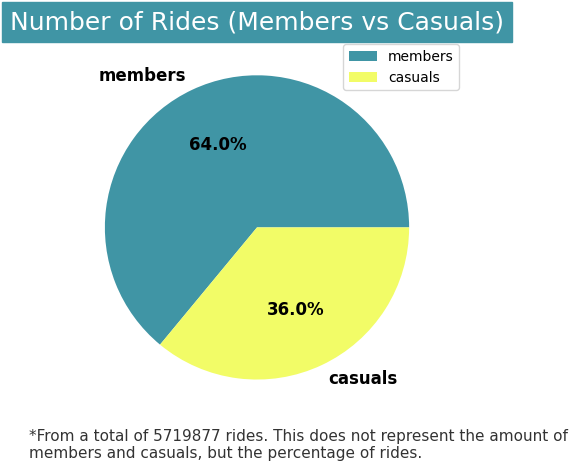

In [27]:
# Set the df for plot:
grouped_member_casual_size = df.groupby('member_casual', dropna=False).size()

# Calculate percentages for plot:
df_graph = round(grouped_member_casual_size / grouped_member_casual_size.sum()* 100, 2) 

# Change 'casual' to 'casuals' and 'member' to 'members' for better display:
df_graph.index = ['members' if x == 'member' else 'casuals' for x in df_graph.index]

# Preset for plot:
color = ['#4095A5', '#F2FC67']

# Plot
plt.pie(df_graph,
        colors=color,
        labels=df_graph.index,
        autopct='%1.1f%%',
        textprops={'weight': 'bold', 'size': 'large'})  # adjust textprops

# Display: plot
plt.title("Number of Rides (Members vs Casuals)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.legend(df_graph.index,
           loc='upper right',bbox_to_anchor=(1.05, 1))
plt.text(-1.5, -1.5, f"*From a total of {df['member_casual'].shape[0]} rides. This does not represent the amount of members and casuals, but the percentage of rides.",
         alpha=0.8,fontsize=11,ha='left', wrap=True,)
plt.tight_layout()
# Save image if set to True
if image_save==True:
    plt.savefig('Pie_Number of Rides (Members vs Casuals).png', dpi=300)

plt.show()


<b>Main Takeaways</b>
<ul>
  <li><b>User Group Distribution:</b> The pie chart illustrates the distribution of rides between members and casual users, indicating the proportion of total rides attributed to each user group.</li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Majority Share:</b> Members account for the majority of rides, representing 64.0% of the total rides. This suggests a strong and consistent user base within the membership program, likely comprising regular commuters or frequent users of bike services.</li>
      <li><b>Stable Presence:</b> The significant percentage of rides attributed to members indicates a stable and reliable user segment, contributing consistently to the overall usage of bike services.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Substantial Contribution:</b> Casual users contribute a significant portion of rides, representing 36.0% of the total rides. This highlights the importance of catering to casual users and accommodating their needs within the bike-sharing system.</li>
      <li><b>Variable Participation:</b> While members dominate the majority of rides, casual users still play a substantial role in overall usage, indicating the diversity of user preferences and usage patterns within the bike-sharing ecosystem.</li>
    </ul>
  </li>
</ul>


#### B. Weekly Ride Distribution (Members vs Casuals)

C:\Users\Jim\AppData\Local\Temp\ipykernel_2776\3743549875.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day_of_the_week = df.groupby(['member_casual','day_of_the_week']).size()


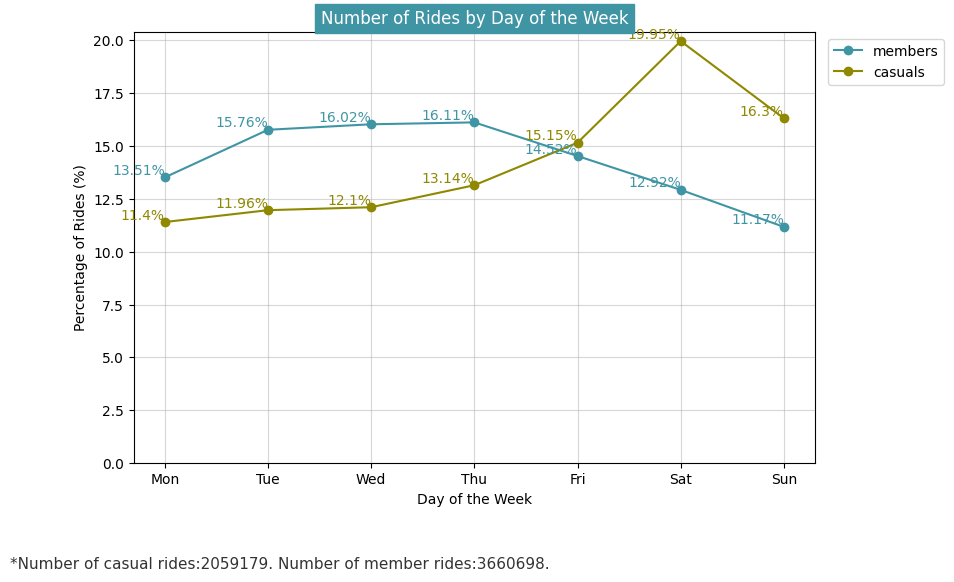

In [59]:
# Set the df for plot:
## Group the DataFrame by 'day_of_the_week' and calculate the size
grouped_day_of_the_week = df.groupby(['member_casual','day_of_the_week']).size()

## Line plot 1: Members
member_counts = grouped_day_of_the_week.loc['member']
## Calculate percentages for plot:
member_percentages = round(member_counts / member_counts.sum()*100, 2) 

## Line plot 2: Casuals
casual_counts = grouped_day_of_the_week.loc['casual']
casual_percentages = round(casual_counts / casual_counts.sum()* 100, 2) 

# Preset for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(10, 6))  # Set the figure size

## Plot:
plt.plot(grouped_day_of_the_week.loc['member'].index, member_percentages.values, 
         color=color[0],marker='o',label='members')
plt.plot(grouped_day_of_the_week.loc['casual'].index, casual_percentages.values,
         color=color[1],marker='o',label='casuals')
# Annotate each point with its percentage value
for x, y in zip(grouped_day_of_the_week.loc['member'].index, member_percentages.values):
    plt.text(x, y, f'{y}%', ha='right', va='bottom', fontsize=10, color=color[0], rotation=0)

for x, y in zip(grouped_day_of_the_week.loc['casual'].index, casual_percentages.values):
    plt.text(x, y, f'{y}%', ha='right', va='bottom', fontsize=10, color=color[1], rotation=0)
# Display: plot
plt.title("Weekly Ride Distribution (Members vs Casuals)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Rides (%)')
plt.ylim(bottom=0)
plt.title('Number of Rides by Day of the Week')
plt.grid(True,alpha=0.5)
plt.legend(df_graph.index,
           loc='upper right',bbox_to_anchor=(1.2, 1))


plt.text(-1.5, -5, f"*Number of casual rides:{casual_counts.sum()}. Number of member rides:{member_counts.sum()}.",
         alpha=0.8,fontsize=11,ha='left', wrap=True)
plt.tight_layout()
# Save image if set to True
if image_save==True:
    plt.savefig('Pie_Number of Rides (Members vs Casuals).png', dpi=300)

plt.show()


<b>Main Takeaways</b>
<ul>
  <li><b>Day-of-the-Week Distribution:</b> Both members and casual users exhibit distinct patterns in ride distribution across different days of the week, reflecting potential variations in usage behavior or preferences.</li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Midweek Peak:</b> Members show peak ride percentages in the middle of the week, with Wednesday (16.02%) and Thursday (16.11%) recording the highest percentages. This suggests that members may utilize bike services more frequently for commuting purposes or midweek activities.</li>
      <li><b>Weekend Decline:</b> Ride percentages for members decrease towards the weekend, with Sunday (11.17%) recording the lowest percentage. This decline may indicate reduced usage for leisure or recreational purposes during weekends among members.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Weekend Surge:</b> Casual users demonstrate a significant increase in ride percentages during the weekend, with Saturday (19.95%) and Sunday (16.30%) recording the highest percentages. This surge suggests that casual users may prefer bike services for leisure or weekend activities, contributing to higher usage during weekends.</li>
      <li><b>Weekday Variations:</b> Ride percentages for casual users show variations across weekdays, with Thursday (13.14%) recording the highest percentage among weekdays. This indicates potential differences in usage behavior or preferences among casual users during weekdays.</li>
    </ul>
  </li>
</ul>


#### C. Monthly Ride Distribution (Members vs Casuals)

C:\Users\Jim\AppData\Local\Temp\ipykernel_2776\3209627935.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_month = df.groupby(['member_casual','month']).size()


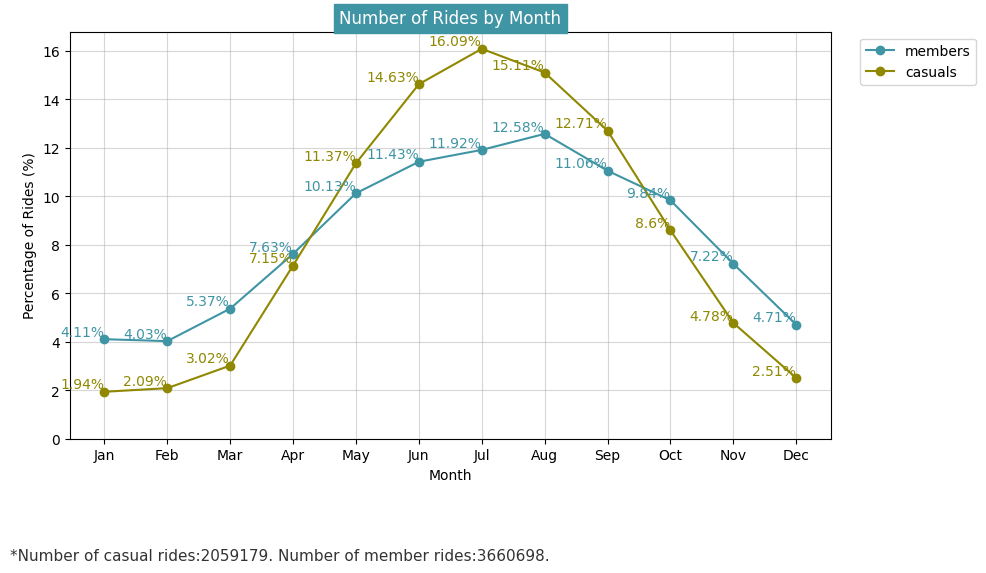

In [52]:
# Set the df for plot:
## Group the DataFrame by 'month' and calculate the size
grouped_month = df.groupby(['member_casual','month']).size()

## Line plot 1: Members
member_counts = grouped_month.loc['member']
## Calculate percentages for plot:
member_percentages = round(member_counts / member_counts.sum()*100, 2) 

## Line plot 2: Casuals
casual_counts = grouped_month.loc['casual']
casual_percentages = round(casual_counts / casual_counts.sum()* 100, 2) 

# Preset for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(10, 6))  # Set the figure size

## Plot:
plt.plot(grouped_month.loc['member'].index, member_percentages.values, 
         color=color[0],marker='o',label='members')
plt.plot(grouped_month.loc['casual'].index, casual_percentages.values,
         color=color[1],marker='o',label='casuals')
# Annotate each point with its percentage value
for x, y in zip(grouped_month.loc['member'].index, member_percentages.values):
    plt.text(x, y, f'{y}%', ha='right', va='bottom', fontsize=10, color=color[0], rotation=0)

for x, y in zip(grouped_month.loc['casual'].index, casual_percentages.values):
    plt.text(x, y, f'{y}%', ha='right', va='bottom', fontsize=10, color=color[1], rotation=0)
# Display: plot
plt.title("Monthly Ride Distribution (Members vs Casuals)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.xlabel('Month')
plt.ylabel('Percentage of Rides (%)')
plt.ylim(bottom=0)
plt.title('Number of Rides by Month')
plt.grid(True,alpha=0.5)
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
plt.text(-1.5, -5, f"*Number of casual rides:{casual_counts.sum()}. Number of member rides:{member_counts.sum()}.",
         alpha=0.8,fontsize=11,ha='left', wrap=True)
plt.tight_layout()
# Save image if set to True
if image_save==True:
    plt.savefig('Monthly Ride Distribution (Members vs Casuals).png', dpi=300)

plt.show()

<b>Main Takeaways</b>
<ul>
  <li><b>Monthly Distribution:</b> The data reveals varying distributions of rides among members and casual users throughout the year, reflecting potential seasonal trends or changes in user behavior.</li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Gradual Increase:</b> Rides by members gradually increase from January to August, with a peak in August at 12.58%. This upward trend suggests a growing usage of bike services by members during the warmer months, possibly for commuting or outdoor activities.</li>
      <li><b>Seasonal Fluctuations:</b> Ride percentages among members fluctuate throughout the year, with higher percentages observed during the spring and summer months and lower percentages during the fall and winter months. These fluctuations may be influenced by factors such as weather conditions and holidays.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Significant Variation:</b> Ride percentages among casual users exhibit more significant variations compared to members, with peaks in the summer months (June, July, and August) and lower percentages during the rest of the year.</li>
      <li><b>Peak Season:</b> The summer months (June, July, and August) see the highest percentages of rides among casual users, indicating a surge in usage during vacation seasons or warmer weather.</li>
    </ul>
  </li>
</ul>


### 3.2.2 About Ride Duration <a id="about-ride-duration"></a>
---

#### A. Weekly Ride Duration (Members vs Casuals)

C:\Users\Jim\AppData\Local\Temp\ipykernel_2776\1676547189.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].median()


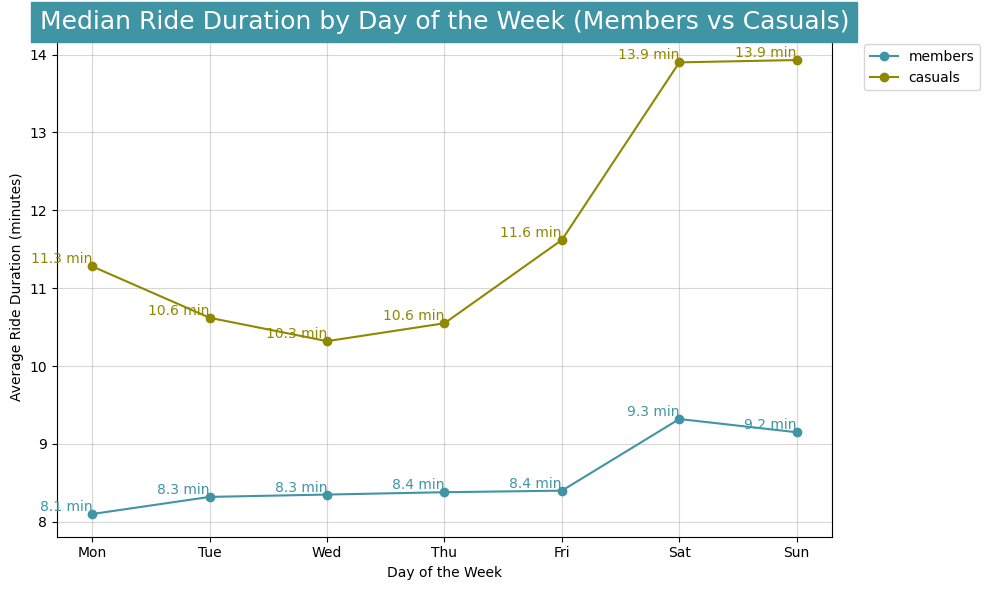

In [46]:
import numpy as np

# Filter out rows where ride_duration is not NA
df_filtered = df.dropna(subset=['ride_duration'])

# Group the DataFrame by 'day_of_the_week' and 'member_casual', and calculate the average ride duration
grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].median()

# Separate the durations for members and casuals
member_durations = grouped_day_of_the_week_duration.loc['member']
casual_durations = grouped_day_of_the_week_duration.loc['casual']

# Preset for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='casuals')

# Annotate each point with its average duration value
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='bottom', fontsize=10, color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='bottom', fontsize=10, color=color[1], rotation=0)

# Display plot
plt.title("Median Ride Duration by Day of the Week (Members vs Casuals)",
          color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Duration (minutes)')
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('Median_Ride_Duration_by_Day_of_the_Week.png', dpi=300)

plt.show()


C:\Users\Jim\AppData\Local\Temp\ipykernel_2776\2596660415.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].mean()


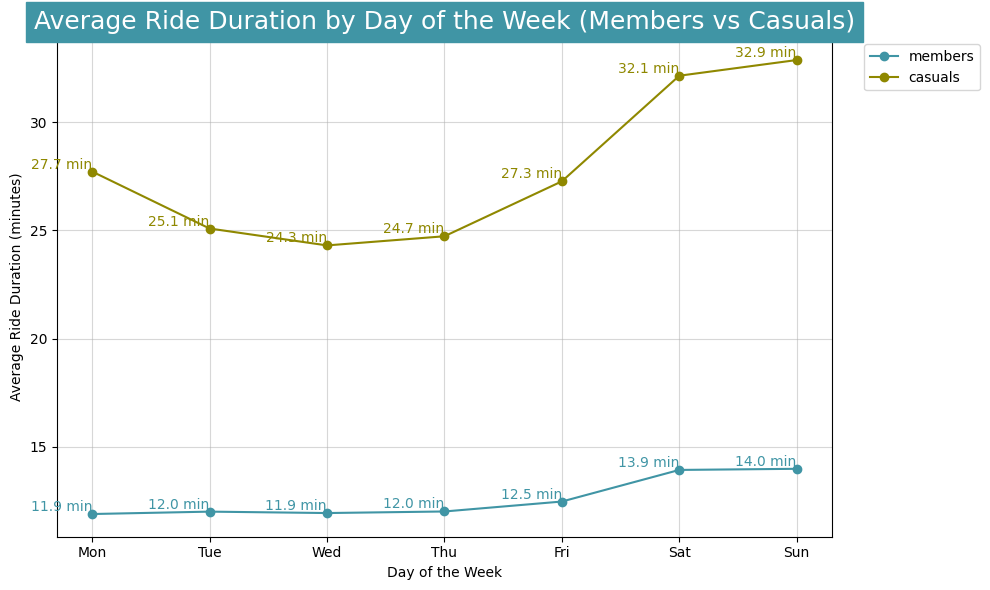

In [14]:
import numpy as np

# Filter out rows where ride_duration is not NA
df_filtered = df.dropna(subset=['ride_duration'])

# Group the DataFrame by 'day_of_the_week' and 'member_casual', and calculate the average ride duration
grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].mean()

# Separate the durations for members and casuals
member_durations = grouped_day_of_the_week_duration.loc['member']
casual_durations = grouped_day_of_the_week_duration.loc['casual']

# Preset for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='casuals')

# Annotate each point with its average duration value
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='bottom', fontsize=10, color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='bottom', fontsize=10, color=color[1], rotation=0)

# Display plot
plt.title("Average Ride Duration by Day of the Week (Members vs Casuals)",
          color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Duration (minutes)')
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('Average_Ride_Duration_by_Day_of_the_Week.png', dpi=300)

plt.show()


<b>Main Takeaways</b>
<ul>
  <li><b>Day-of-the-Week Patterns:</b> Both members and casual users show distinct patterns in ride durations across different days of the week, indicating potential differences in usage behavior.</li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Consistent Patterns:</b> Members demonstrate relatively consistent ride durations from Monday to Friday, suggesting regular commuting habits or usage patterns during weekdays (may be commuting to work). </li>
      <li><b>Weekend Variations:</b> Ride durations for members increase notably during the weekend. This suggests a shift towards longer rides for leisure or recreational purposes during weekends.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Varying Patterns:</b> Casual users exhibit more variability in ride durations across different days of the week compared to members.</li>
      <li><b>Weekend Surges:</b> Ride durations for casual users show significant increases during the weekend, indicating a preference for longer rides during leisure time or weekend outings.</li>
    </ul>
  </li>
</ul>


#### B. Monthly Ride Duration (Members vs Casuals)

C:\Users\Jim\AppData\Local\Temp\ipykernel_2776\265153950.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_month_duration = df.dropna(subset=['ride_duration']).groupby(['member_casual', 'month'])['ride_duration'].mean()


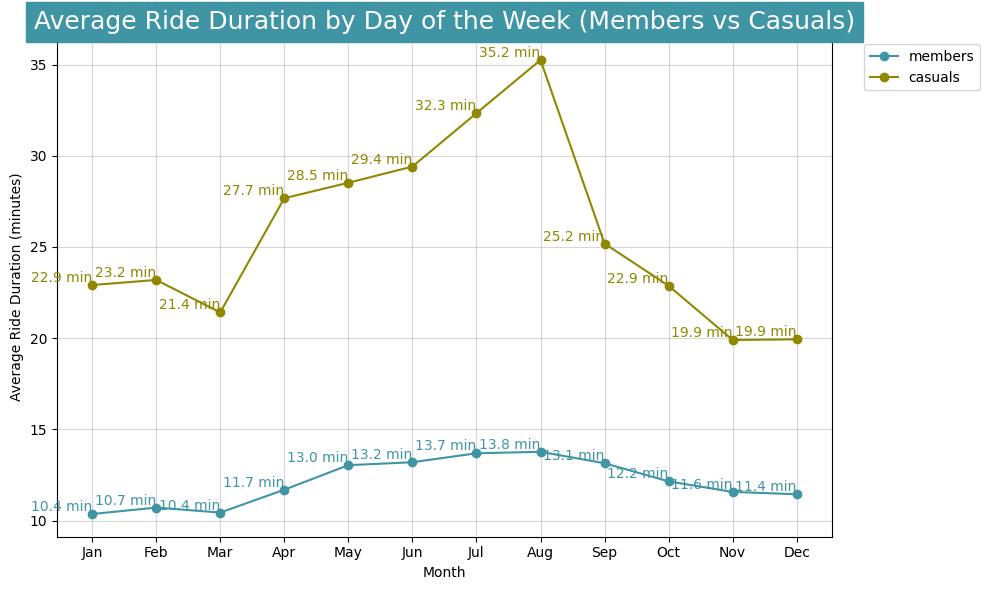

In [15]:
# Group the DataFrame by 'month' and 'member_casual', and calculate the average ride duration
grouped_month_duration = df.dropna(subset=['ride_duration']).groupby(['member_casual', 'month'])['ride_duration'].mean()

# Separate the durations for members and casuals
member_durations = grouped_month_duration.loc['member']
casual_durations = grouped_month_duration.loc['casual']

# Preset for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='casuals')

# Annotate each point with its average duration value
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='bottom', fontsize=10, color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='bottom', fontsize=10, color=color[1], rotation=0)

# Display plot
plt.title("Average Ride Duration by Day of the Week (Members vs Casuals)",
          color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')
plt.xlabel('Month')
plt.ylabel('Average Ride Duration (minutes)')
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('Average_Ride_Duration_by_month.png', dpi=300)

plt.show()


<b>Main Takeaways</b>
<ul>
  <li><b>Seasonal Variations:</b> Ride durations exhibit fluctuations throughout the year, likely influenced by seasonal factors such as weather and holidays. They reach an all-time low during winter and experience a significant and steady increase at the start of spring, peaking during July and August.</li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Consistent Durations:</b> Despite fluctuations, ride durations for members generally remain within a relatively narrow range, indicating consistent usage patterns over time. This consistency reinforces the hypothesis that members use bikes for commuting purposes, as travel times remain relatively stable throughout the year.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Higher Variability:</b> Ride durations for casual users demonstrate greater variability compared to members, with larger fluctuations observed throughout the year.</li>
    </ul>
  </li>
</ul>


### 3.2.3 About Rideable Type <a id="about-rideable-type"></a>
---

#### A. Bar Chart: Rideable Type (Electric vs Classic Bikes)

C:\Users\Jim\AppData\Local\Temp\ipykernel_2776\3315427900.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rideable_type_size = filtered_df.groupby('rideable_type', dropna=False).size()


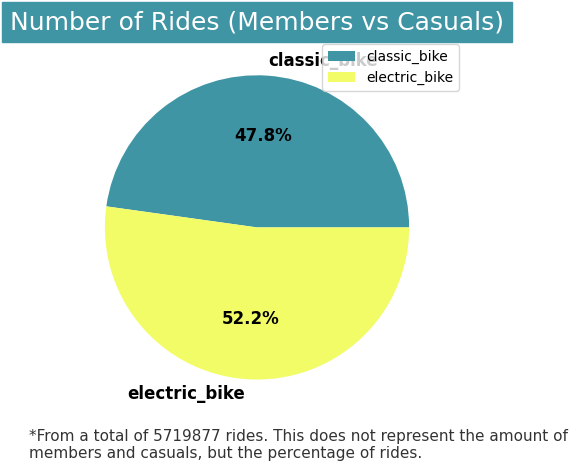

In [16]:
# Set the df for plot:
filtered_df=df[df['rideable_type']!='docked_bike'].reset_index(drop=True)
filtered_df['rideable_type'] = filtered_df['rideable_type'].cat.remove_unused_categories()
grouped_rideable_type_size = filtered_df.groupby('rideable_type', dropna=False).size()

# Calculate percentages for plot:
df_graph =grouped_rideable_type_size
df_graph = round(grouped_rideable_type_size / grouped_rideable_type_size.sum() * 100, 2)

# Preset for plot:
color = ['#4095A5', '#F2FC67']

# Plot
plt.pie(df_graph,
        colors=color,
        labels=df_graph.index,
        autopct='%1.1f%%',
        textprops={'weight': 'bold', 'size': 'large'})  # adjust textprops

# Display: plot
plt.title("Number of Rides (Members vs Casuals)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.legend(df_graph.index,
           loc='upper right',bbox_to_anchor=(1.05, 1))
plt.text(-1.5, -1.5, f"*From a total of {df['rideable_type'].shape[0]} rides. This does not represent the amount of members and casuals, but the percentage of rides.",
         alpha=0.8,fontsize=11,ha='left', wrap=True,)
plt.tight_layout()
# Save image if set to True
if image_save==True:
    plt.savefig('Bar_Rideable Type (Electric vs Classic Bikes).png', dpi=300)

plt.show()


<b>Main Takeaways</b>
<ul>
  <li><b>Balanced/Diverse Usage:</b> The overall usage of bikes is relatively balanced, with electric bikes being slightly more popular compared to classic bikes. This indicates a close preference between the two types of bikes among all riders. The nearly even split in bike usage highlights the importance of maintaining a diverse fleet.</li>
  <li><b>Potential for Growth:</b> The slight edge of electric bike usage could signal a growing trend towards electric bike adoption. This trend might continue as more riders become aware of and accustomed to the benefits of electric bikes.</li>
</ul>


#### B. Bar Charts: Rideable Types (Members vs Casuals)

<p><b>Introduction:</b> This analysis examines the usage patterns of classic bikes versus electric bikes among different user groups (members and casual users). Understanding these patterns helps in optimizing bike availability and improving user satisfaction.</p>

C:\Users\Jim\AppData\Local\Temp\ipykernel_2776\3513157324.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rideable_type_size = filtered_df.groupby(['member_casual', 'rideable_type']).size()


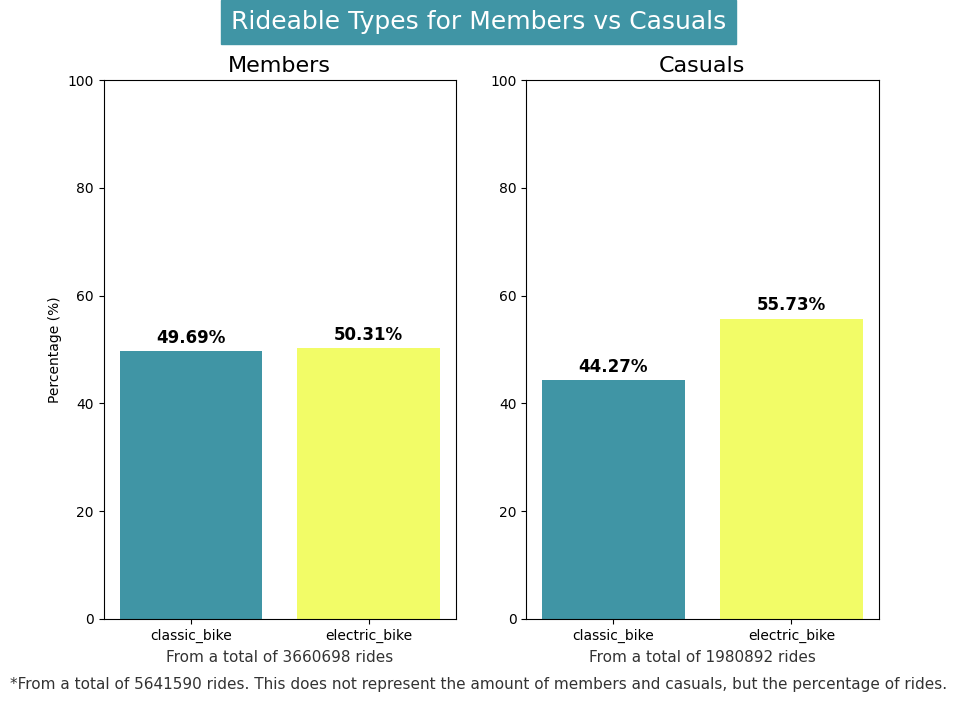

In [38]:
# Set the df for plot:
filtered_df = df[df['rideable_type'] != 'docked_bike'].reset_index(drop=True)
filtered_df['rideable_type'] = filtered_df['rideable_type'].cat.remove_unused_categories()

# Group by 'member_casual' and 'rideable_type' and calculate sizes
grouped_rideable_type_size = filtered_df.groupby(['member_casual', 'rideable_type']).size()

# Calculate percentages for plots:
# Plot 1: Rideable_type percentages for members
df_graph_member = grouped_rideable_type_size['member']
df_graph_member = round(df_graph_member / df_graph_member.sum() * 100, 2)

# Plot 2: Rideable_type percentages for casuals
df_graph_casual = grouped_rideable_type_size['casual']
df_graph_casual = round(df_graph_casual / df_graph_casual.sum() * 100, 2)

# Preset for plot:
colors = ['#4095A5', '#F2FC67']

# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharex=True)

# Plot for members
bars1 = ax1.bar(df_graph_member.index, df_graph_member, color=colors)
ax1.set_title("Members", fontsize=16)
ax1.set_ylabel('Percentage (%)')
ax1.set_ylim(0, 100)
#ax1.set_xticks(range(len(df_graph_member.index)))
#ax1.set_xticklabels(df_graph_member.index, rotation=0)

## Add percentages on top of the bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=12, weight='bold')

# Plot for casuals
bars2 = ax2.bar(df_graph_casual.index, df_graph_casual, color=colors)
ax2.set_title("Casuals", fontsize=16)
#ax2.set_ylabel('Percentage (%)')
ax2.set_ylim(0, 100)
#ax2.set_xticks(range(len(df_graph_casual.index)))
#ax2.set_xticklabels(df_graph_casual.index, rotation=0)

## Add percentages on top of the bars
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=12, weight='bold')

# Add a main title
fig.suptitle("Rideable Types for Members vs Casuals",
             color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')

# Add text below the plots
ax1.text(0.5, -8, f"From a total of {grouped_rideable_type_size['member'].sum()} rides",
         ha='center', fontsize=11, alpha=0.8, wrap=True)
ax2.text(0.5, -8, f"From a total of {grouped_rideable_type_size['casual'].sum()} rides",
         ha='center', fontsize=11, alpha=0.8, wrap=True)
fig.text(0.5, 0.01, f"*From a total of {grouped_rideable_type_size['member'].sum()+grouped_rideable_type_size['casual'].sum()} rides. This does not represent the amount of members and casuals, but the percentage of rides.",
         ha='center', fontsize=11, alpha=0.8, wrap=True)

# Save image if set to True
image_save = False  # Set to True if you want to save the image
if image_save:
    plt.savefig('Bars_Rideable Types (Members vs Casuals).png', dpi=300, bbox_inches='tight')

# Display plot
plt.show()


<b>Main Takeaways</b>
<ul>
  <li><b>Overall Distribution:</b> The data reveals a balanced distribution of bike types among both members and casual users, with electric bikes slightly more favored in both groups.</li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Even Distribution:</b> Among members, the percentage distribution of bike types is almost evenly split. This indicates a balanced preference between the two bike types among members.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Preferential Bias:</b> Casual users exhibit a more pronounced preference for electric bikes. This suggests that casual users may find electric bikes more appealing or convenient for their riding needs.</li>
    </ul>
  </li>
</ul>


C:\Users\Jim\AppData\Local\Temp\ipykernel_2776\3547060967.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rideable_type_size = filtered_df.groupby(['member_casual', 'rideable_type']).size()


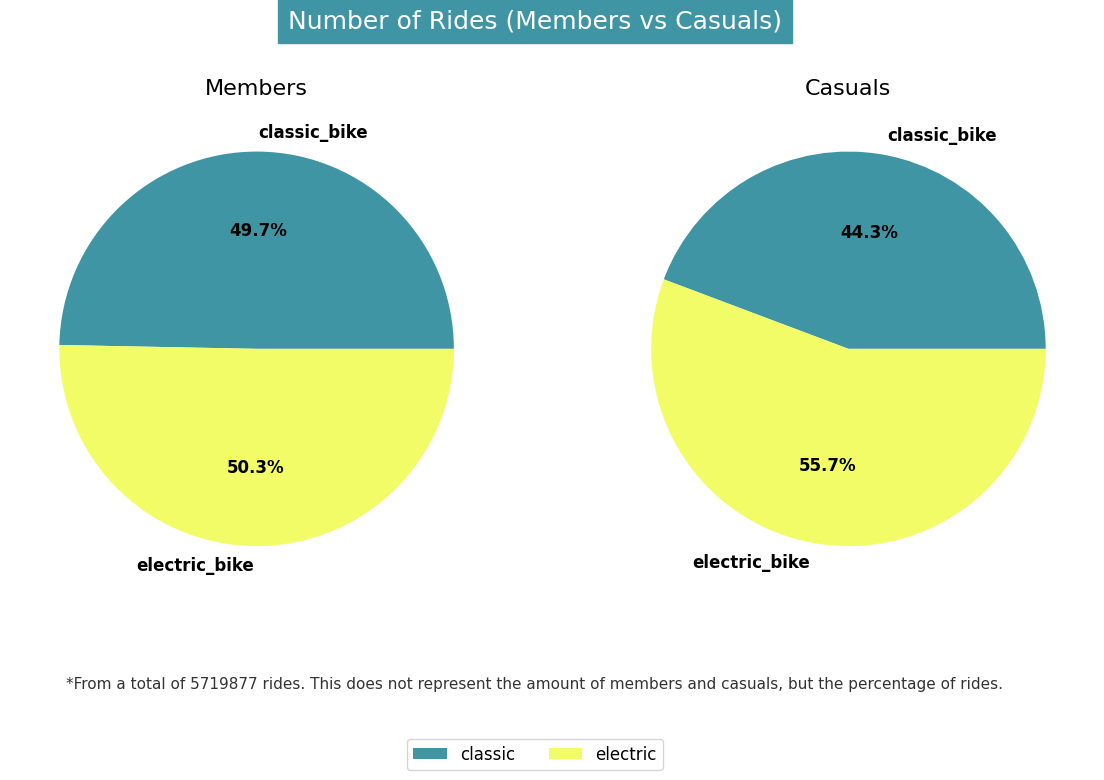

In [39]:
# Set the df for plot:
filtered_df = df[df['rideable_type'] != 'docked_bike'].reset_index(drop=True)
filtered_df['rideable_type'] = filtered_df['rideable_type'].cat.remove_unused_categories()

# Group by 'member_casual' and 'rideable_type' and calculate sizes
grouped_rideable_type_size = filtered_df.groupby(['member_casual', 'rideable_type']).size()

# Calculate percentages for plots:
# Plot 1: Rideable_type percentages for members
df_graph_member = grouped_rideable_type_size['member']
df_graph_member = round(df_graph_member / df_graph_member.sum() * 100, 2)

# Plot 2: Rideable_type percentages for casuals:
df_graph_casual = grouped_rideable_type_size['casual']
df_graph_casual = round(df_graph_casual / df_graph_casual.sum() * 100, 2)

# Preset for plot:
colors = ['#4095A5', '#F2FC67']
rideable_classic_electric = ['classic', 'electric']

# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True)

# Plot for members
wedges1, texts1, autotexts1 = ax1.pie(df_graph_member,
                                      colors=colors,
                                      labels=df_graph_member.index,
                                      autopct='%1.1f%%',
                                      textprops={'weight': 'bold', 'size': 'large'})
ax1.set_title("Members", fontsize=16)

# Plot for casuals
wedges2, texts2, autotexts2 = ax2.pie(df_graph_casual,
                                      colors=colors,
                                      labels=df_graph_casual.index,
                                      autopct='%1.1f%%',
                                      textprops={'weight': 'bold', 'size': 'large'})
ax2.set_title("Casuals", fontsize=16)

# Add a main title
plt.suptitle("Number of Rides (Members vs Casuals)",
             color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')

# Create a unifying legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, rideable_classic_electric, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)

# Add text below the plots
fig.text(0.5, 0.01, f"*From a total of {df['rideable_type'].shape[0]} rides. This does not represent the amount of members and casuals, but the percentage of rides.",
         ha='center', fontsize=11, alpha=0.8, wrap=True)

# Save image if set to True
image_save = False  # Set to True if you want to save the image
if image_save:
    plt.savefig('Pie_Rideable Types for Members vs Casuals.png', dpi=300, bbox_inches='tight')

# Display plot
plt.show()


<b>Main Takeaways:</b><br>
<ul>
  <li><b>Members:</b> The data indicates that members are using both classic bikes and electric bikes at comparable rates, with a slight preference for electric bikes. This trend suggests that members appreciate the convenience and efficiency of electric bikes for their commuting or leisure activities.</li>
  <li><b>Casual Users:</b> Casual users show a noticeable preference for electric bikes over classic bikes. This could imply that casual users, who may not bike regularly, find electric bikes more accessible and user-friendly, particularly for longer distances or less frequent use.</li>
</ul>